In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.svm import SVC 
from imblearn.over_sampling import RandomOverSampler

In [2]:
#Define File Path
# vec20avg_path = "./vec_data/vec20_avg.npz"
# vec25avg_path = "./vec_data/vec25_avg.npz"
vec30avg_path = "./vec_data/vec30_avg.npz"
# vec35avg_path = "./vec_data/vec35_avg.npz"
# vec20sum_path = "./vec_data/vec20_sum.npz"
# vec20sum_path = "./vec_data/vec20_sum.npz"
# vec25sum_path = "./vec_data/vec25_sum.npz"
vec30sum_path = "./vec_data/vec30_sum.npz"
# vec35sum_path = "./vec_data/vec35_sum.npz"
# freq_stance_labels = "./vec_data/freq_stance_labels.npz"
# oh_stance_labels = "./vec_data/oh_stance_labels.npz"
le_stance_labels = "./vec_data/le_stance_labels.npz"

In [3]:
def load_npz_file(filepath):
    # Load the numpy array from the .npz file
    with np.load(filepath, allow_pickle=True) as data:
        for key in data.keys():
            arr = data[key]
            break
    return arr

In [4]:
# vec20avg = load_npz_file(vec20avg_path)
# vec25avg = load_npz_file(vec25avg_path)
vec30avg = load_npz_file(vec30avg_path)
# vec35avg = load_npz_file(vec35avg_path)
# vec20sum = load_npz_file(vec20sum_path)
# vec20sum = load_npz_file(vec20sum_path)
# vec25sum = load_npz_file(vec25sum_path)
vec30sum = load_npz_file(vec30sum_path)
# vec35sum = load_npz_file(vec35sum_path)
# freq_label = load_npz_file(freq_stance_labels)
# oh_label = load_npz_file(oh_stance_labels)
le_label = load_npz_file(le_stance_labels)

In [5]:
#指派實際要使用的Data與Label
# data = vec30avg
data = vec30sum
# label = np.argmax(oh_label, axis=1)
# label = oh_label
# label = freq_label
label = le_label

In [6]:
print(data.shape)
print(label.shape)
print(np.unique(label))
print(np.unique(label, return_counts=True))

(445, 1, 300)
(445,)
[0 1 2 3]
(array([0, 1, 2, 3]), array([ 11, 201,  74, 159], dtype=int64))


In [10]:
# Data Augmentation using Oversampling
# Define the oversampling ratio for each class
oversample_ratio = {0: 100, 1: 201, 2: 120, 3: 159}
# Initialize the oversampler
oversampler = RandomOverSampler(sampling_strategy=oversample_ratio)
# Reshape your data to a 2D matrix of shape (n_samples, n_features)
X = data.reshape(-1, 300)
# Apply oversampling to X and y
X_resampled, y_resampled = oversampler.fit_resample(X, label)
# Reshape X back to its original shape
# X_resampled = X_resampled.reshape(-1, 1, 300)

In [ ]:
# print(X_resampled.shape)
# print(X_resampled)

In [ ]:
# print(y_resampled.shape)
# print(y_resampled)

In [11]:
# Using original data
# train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.2)
# Using oversampling data
train_data, test_data, train_labels, test_labels = train_test_split(X_resampled, y_resampled, test_size=0.3)
print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

Train data shape: (406, 300)
Train labels shape: (406,)
Test data shape: (174, 300)
Test labels shape: (174,)


In [12]:
# find best parameters with SVC
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([20,25,30,35,40,45,50])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(train_data, train_labels)
grid.best_params_

{'C': 20, 'gamma': 0.05, 'kernel': 'poly'}

In [13]:
clf = SVC(C=20, gamma=0.05, kernel='poly') 
clf.fit(train_data, train_labels) 

y_pred = clf.predict(test_data)

print('Accuracy Score: {:.4f}'.format(accuracy_score(test_labels, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, test_labels, average='micro')))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, test_labels, average='micro')))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, test_labels, average='micro')))
print("\n",classification_report(y_pred, test_labels))

Accuracy Score: 0.8908
SVC f1-score  : 0.8908
SVC precision : 0.8908
SVC recall    : 0.8908

               precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.88      0.84      0.86        61
           2       0.95      0.90      0.93        42
           3       0.79      0.93      0.85        40

    accuracy                           0.89       174
   macro avg       0.90      0.90      0.90       174
weighted avg       0.90      0.89      0.89       174



<AxesSubplot: >

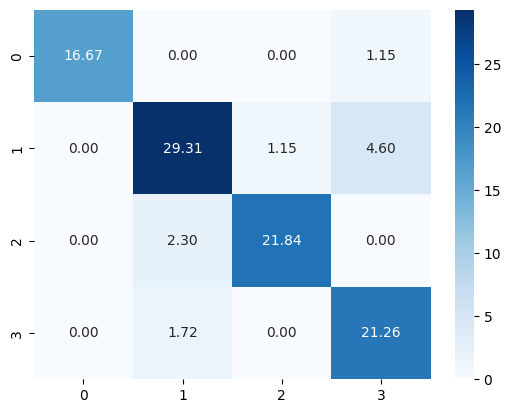

In [14]:
cf_matrix = confusion_matrix(y_pred, test_labels)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")